In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB

In [2]:
df=pd.read_csv('./Credit.csv')

In [3]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


In [4]:
df.shape

(100000, 28)

In [5]:
df.columns


Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [6]:
df.describe

<bound method NDFrame.describe of            ID  Customer_ID  Month           Name   Age          SSN  \
0        5634         3392      1  Aaron Maashoh  23.0  821000265.0   
1        5635         3392      2  Aaron Maashoh  23.0  821000265.0   
2        5636         3392      3  Aaron Maashoh  23.0  821000265.0   
3        5637         3392      4  Aaron Maashoh  23.0  821000265.0   
4        5638         3392      5  Aaron Maashoh  23.0  821000265.0   
...       ...          ...    ...            ...   ...          ...   
99995  155625        37932      4          Nicks  25.0   78735990.0   
99996  155626        37932      5          Nicks  25.0   78735990.0   
99997  155627        37932      6          Nicks  25.0   78735990.0   
99998  155628        37932      7          Nicks  25.0   78735990.0   
99999  155629        37932      8          Nicks  25.0   78735990.0   

      Occupation  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0      Scientist       19114.12     

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

In [8]:
df.isnull().sum()

ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

In [9]:
df['Credit_Score'].value_counts()

Standard    53174
Poor        28998
Good        17828
Name: Credit_Score, dtype: int64

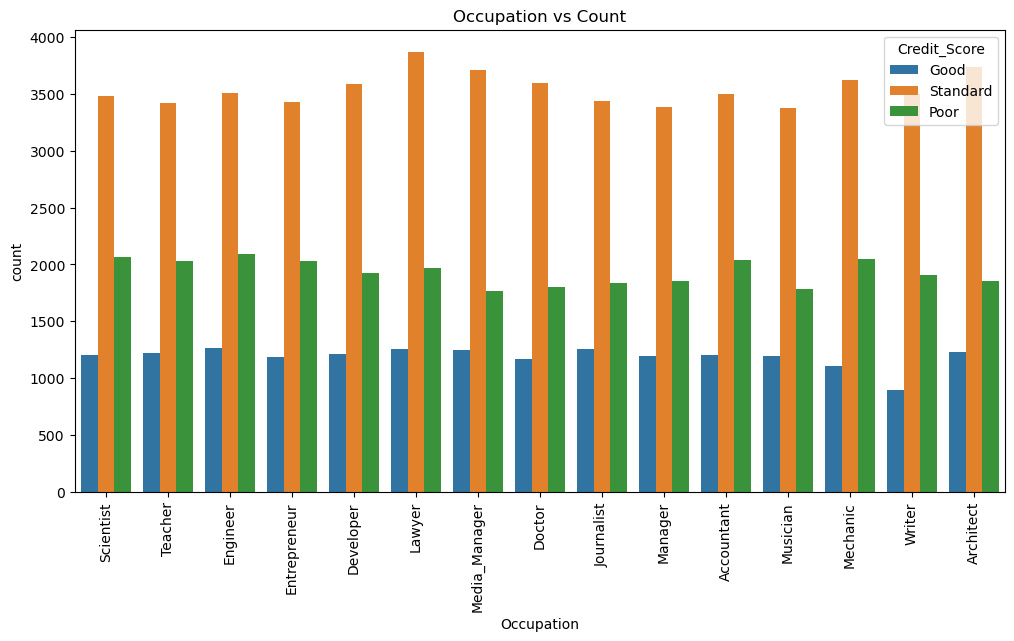

In [10]:

plt.figure(figsize=(12,6))
sns.countplot(data=df, x="Occupation", hue="Credit_Score")
plt.title("Occupation vs Count")
plt.xticks(rotation=90)
plt.show()             

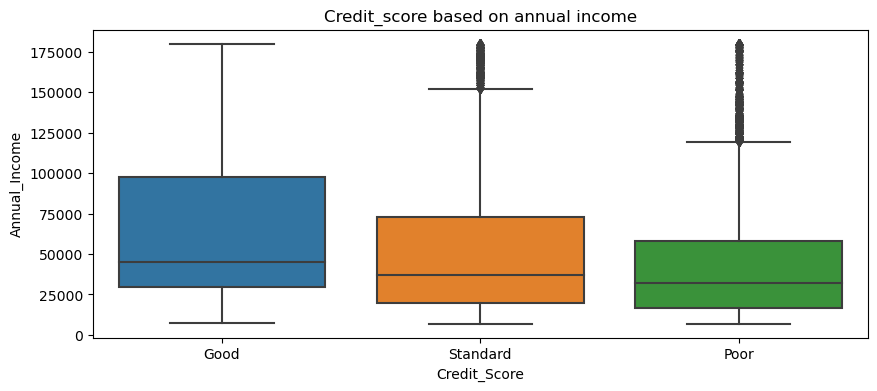

In [11]:
plt.figure(figsize=(10,4))
sns.boxplot(data=df,x='Credit_Score',y='Annual_Income')
plt.title('Credit_score based on annual income')
plt.show()

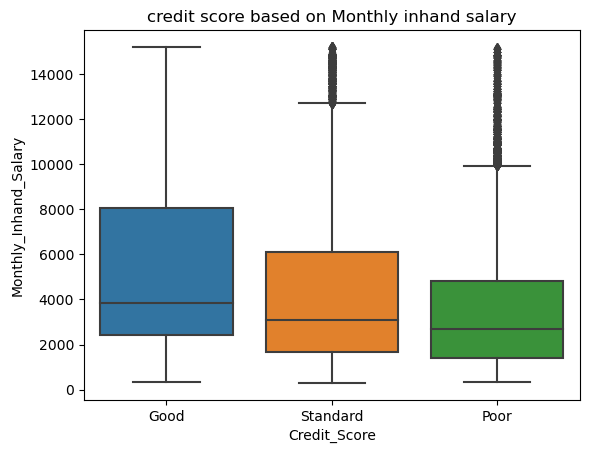

In [12]:
sns.boxplot(data=df,x='Credit_Score',y="Monthly_Inhand_Salary")
plt.title("credit score based on Monthly inhand salary")
plt.show()

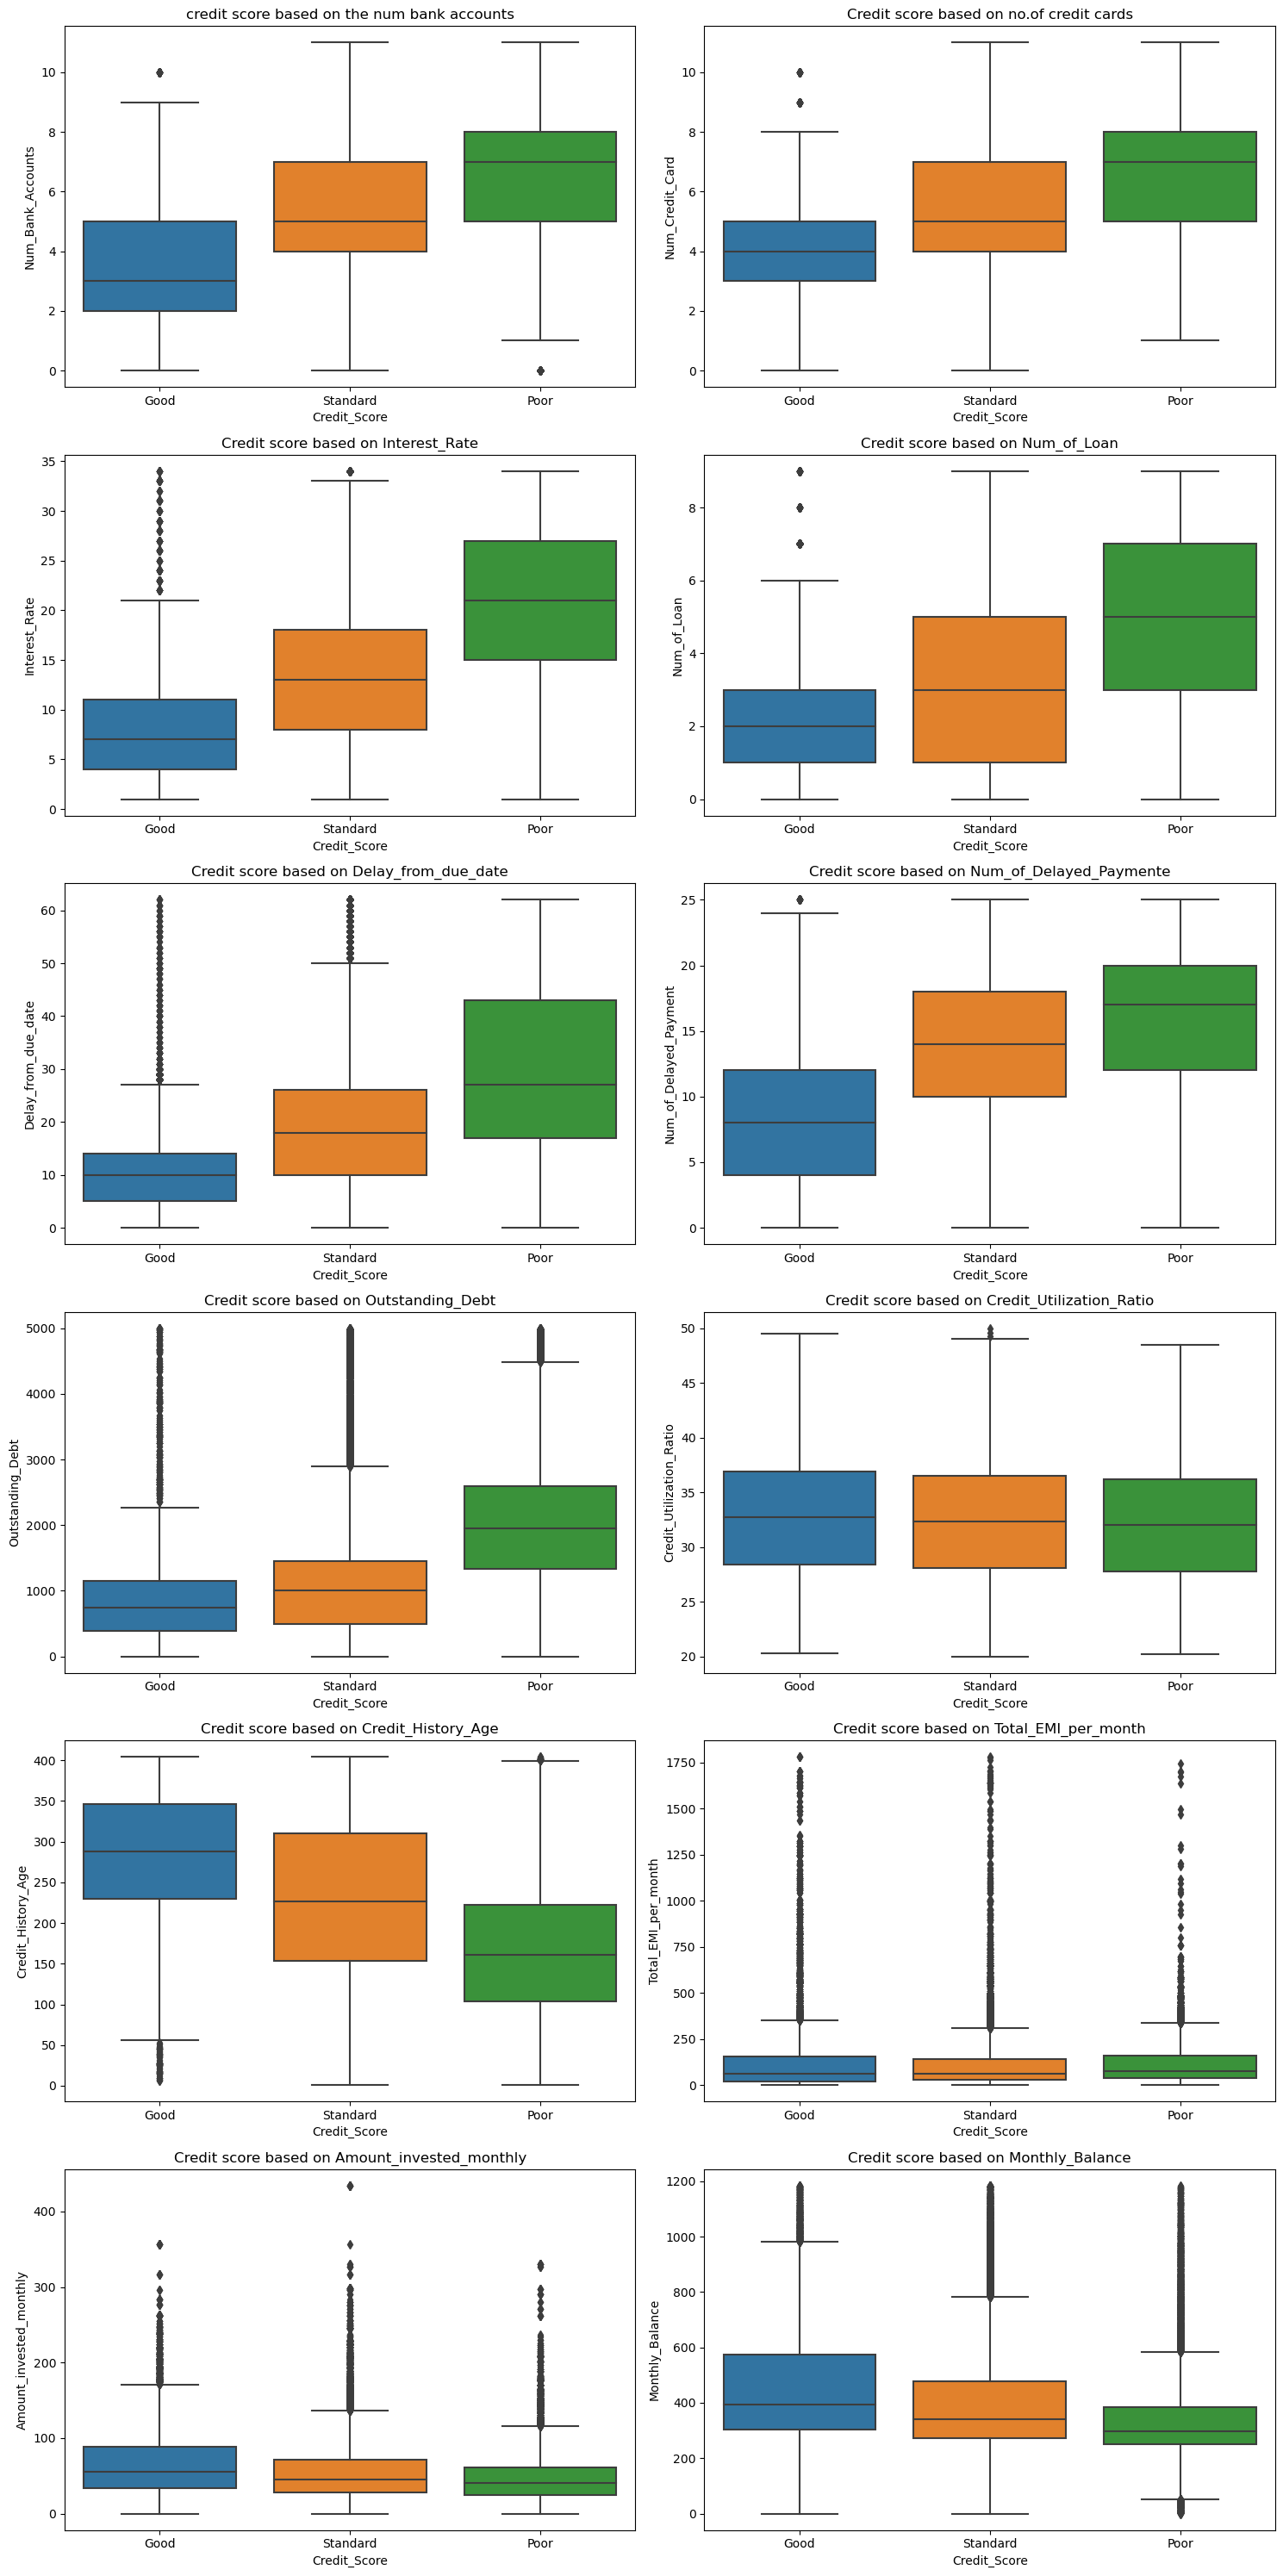

In [13]:
plt.figure(figsize=(15,30))
plt.subplot(6,2,1)
sns.boxplot(data=df,x='Credit_Score',y='Num_Bank_Accounts')
plt.title("credit score based on the num bank accounts")

plt.subplot(6,2,2)
sns.boxplot(data=df,x="Credit_Score",y='Num_Credit_Card')
plt.title("Credit score based on no.of credit cards")

plt.subplot(6,2,3)
sns.boxplot(data=df,x="Credit_Score",y='Interest_Rate')
plt.title("Credit score based on Interest_Rate")

plt.subplot(6,2,4)
sns.boxplot(data=df,x="Credit_Score",y='Num_of_Loan')
plt.title("Credit score based on Num_of_Loan")

plt.subplot(6,2,5)
sns.boxplot(data=df,x="Credit_Score",y='Delay_from_due_date')
plt.title("Credit score based on Delay_from_due_date")

plt.subplot(6,2,6)
sns.boxplot(data=df,x="Credit_Score",y='Num_of_Delayed_Payment')
plt.title("Credit score based on Num_of_Delayed_Paymente")

plt.subplot(6,2,7)
sns.boxplot(data=df,x="Credit_Score",y='Outstanding_Debt')
plt.title("Credit score based on Outstanding_Debt")

plt.subplot(6,2,8)
sns.boxplot(data=df,x="Credit_Score",y='Credit_Utilization_Ratio')
plt.title("Credit score based on Credit_Utilization_Ratio")

plt.subplot(6,2,9)
sns.boxplot(data=df,x="Credit_Score",y='Credit_History_Age')
plt.title("Credit score based on Credit_History_Age")

plt.subplot(6,2,10)
sns.boxplot(data=df,x="Credit_Score",y='Total_EMI_per_month')
plt.title("Credit score based on Total_EMI_per_month")

plt.subplot(6,2,11)
sns.boxplot(data=df,x="Credit_Score",y='Amount_invested_monthly')
plt.title("Credit score based on Amount_invested_monthly")

plt.subplot(6,2,12)
sns.boxplot(data=df,x="Credit_Score",y='Monthly_Balance')
plt.title("Credit score based on Monthly_Balance")

plt.tight_layout()
plt.show()

In [14]:
df["Credit_Mix"] = df["Credit_Mix"].map({"Standard": 1, 
                               "Good": 2, 
                               "Bad": 0})

In [15]:
df['Credit_Mix'].isna().sum()

0

In [16]:
x = np.array(df[["Annual_Income", "Monthly_Inhand_Salary", 
                   "Num_Bank_Accounts", "Num_Credit_Card", 
                   "Interest_Rate", "Num_of_Loan", 
                   "Delay_from_due_date", "Num_of_Delayed_Payment", 
                   "Credit_Mix", "Outstanding_Debt", 
                   "Credit_History_Age", "Monthly_Balance"]])
y = np.array(df["Credit_Score"])

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=64)

In [19]:
model=RandomForestClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
acc=accuracy_score(y_test,y_pred)
print(acc)

0.807


In [20]:

model=DecisionTreeClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
acc=accuracy_score(y_test,y_pred)
print(acc)

0.75352


In [21]:

model=KNeighborsClassifier(n_neighbors=5)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
acc=accuracy_score(y_test,y_pred)
print(acc)

0.76384
